In [199]:
import pandas as pd
pd.set_option("display.precision", 2)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


### Загрузите файл HR.csv в pandas dataframe

In [200]:
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Рассчитайте основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

In [202]:
df_describe = pd.DataFrame()
df_describe['satisfaction_level'] = df['satisfaction_level'].describe()
df_describe['last_evaluation'] = df['last_evaluation'].describe()
df_describe['number_project'] = df['number_project'].describe()
df_describe['average_montly_hours'] = df['average_montly_hours'].describe()
df_describe['time_spend_company'] = df['time_spend_company'].describe()
df_describe.loc['median'] = [
    np.median(df['satisfaction_level']),
    np.median(df['last_evaluation']),
    np.median(df['number_project']),
    np.median(df['average_montly_hours']),
    np.median(df['time_spend_company']),
]
df_describe

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
count,14999.00,14999.00,14999.00,14999.00,14999.00
mean,0.61,0.72,3.80,201.05,3.50
std,0.25,0.17,1.23,49.94,1.46
min,0.09,0.36,2.00,96.00,2.00
25%,0.44,0.56,3.00,156.00,3.00
50%,0.64,0.72,4.00,200.00,3.00
75%,0.82,0.87,5.00,245.00,4.00
max,1.00,1.00,7.00,310.00,10.00
median,0.64,0.72,4.00,200.00,3.00


In [203]:
df_describe_2 = pd.DataFrame()
df_describe_2['Work_accident'] = {'mode': df['Work_accident'].mode()[0]}
df_describe_2['left'] = {'mode': df['left'].mode()[0]}
df_describe_2['promotion_last_5years'] = {'mode': df['promotion_last_5years'].mode()[0]}
df_describe_2['department'] = {'mode': df['department'].mode()[0]}
df_describe_2['salary'] = {'mode': df['salary'].mode()[0]}
df_describe_2


,Work_accident,left,promotion_last_5years,department,salary
mode,0,0,0,sales,low


### Рассчитайте и визуализировать корреляционную матрицу для количественных переменных

In [204]:
df_corr = df[[
    'satisfaction_level',
    'last_evaluation',
    'number_project',
    'average_montly_hours',
    'time_spend_company'
]]
df_corr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
0,0.38,0.53,2,157,3
1,0.80,0.86,5,262,6
2,0.11,0.88,7,272,4
3,0.72,0.87,5,223,5
4,0.37,0.52,2,159,3


In [205]:
df_corr.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.00,0.11,-0.14,-0.02,-0.10
last_evaluation,0.11,1.00,0.35,0.34,0.13
number_project,-0.14,0.35,1.00,0.42,0.20
average_montly_hours,-0.02,0.34,0.42,1.00,0.13
time_spend_company,-0.10,0.13,0.20,0.13,1.00


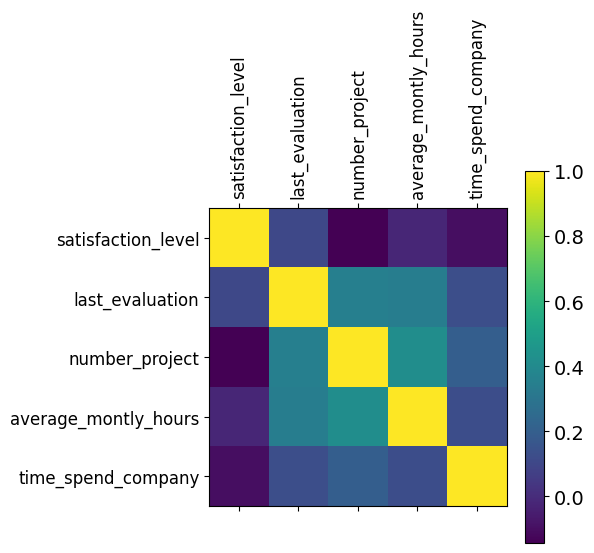

In [206]:
plt.matshow(df_corr.corr())
plt.xticks(range(df_corr.shape[1]), df_corr.columns, fontsize=12, rotation=90)
plt.yticks(range(df_corr.shape[1]), df_corr.columns, fontsize=12)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

Самые скоррелированные:

1.   number_project c average_montly_hours
2.   last_evaluation c number_project






Наименее скоррелированные:

1.   satisfaction_level и number_project
2.   satisfaction_level и time_spend_company



### Рассчитайте сколько сотрудников работает в каждом департаменте

In [207]:
df.groupby('department')['department'].count() \
    .reset_index(name='count') \
    .sort_values(['count'], ascending=False)

,department,count
7,sales,4140
9,technical,2720
8,support,2229
0,IT,1227
6,product_mng,902
5,marketing,858
1,RandD,787
2,accounting,767
3,hr,739
4,management,630


### Показать распределение сотрудников по зарплатам

In [208]:
df.groupby('salary')['salary'].count().reset_index(name='salary_count') \
    .sort_values(['salary_count'], ascending=False) \
    .style.bar(align='mid', color='green')

,salary,salary_count
1,low,7316
2,medium,6446
0,high,1237


### Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

In [209]:
# df_dep_sal = df.groupby(['department', 'salary'])[['salary']].count()
df_dep_sal = pd.DataFrame()
df_dep_sal['count'] = df.groupby(['department', 'salary'])[['salary']].count()
chart_dep_sal = df_dep_sal.pivot_table(index=['department'], columns='salary', values='count', aggfunc='first').reset_index().set_index('department')
chart_dep_sal

salary,high,low,medium
department,,,
IT,83,609,535
RandD,51,364,372
accounting,74,358,335
hr,45,335,359
management,225,180,225
marketing,80,402,376
product_mng,68,451,383
sales,269,2099,1772
support,141,1146,942


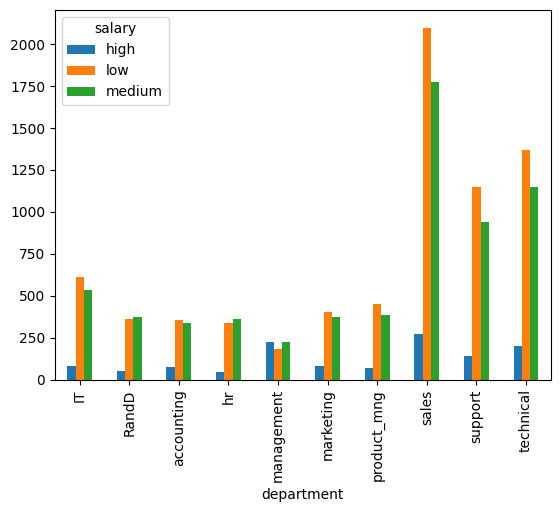

In [210]:
chart_dep_sal.plot.bar();

### Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

In [211]:
df_high = list(df.loc[df['salary'] == 'high']['average_montly_hours'])
df_low = list(df.loc[df['salary'] == 'low']['average_montly_hours'])


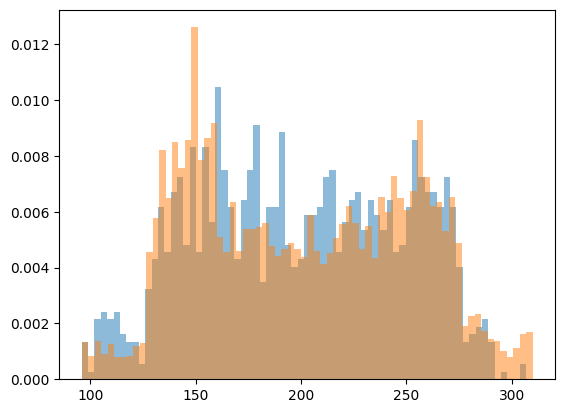

In [212]:
plt.hist(df_high, bins=70, alpha = 0.5, density=True);
plt.hist(df_low, bins=70, alpha = 0.5, density=True);

In [213]:
stat, pval = stats.ttest_ind(df_high, df_low)
print(stat, pval)

-0.7288680398062308 0.4661023478267259


Статистика t-теста равна = **–0,723**, а значение p равно **0,466** .

Поскольку p-значение теста (**0,466**) больше 0,05, мы не можем отвергнуть нулевую гипотезу теста.

У нас недостаточно данных, чтобы сказать, что размер оклада влияет на время проведенное на работе.

### Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):



*   Доля сотрудников с повышением за последние 5 лет
*   Средняя степень удовлетворенности
*   Среднее количество проектов



In [214]:
df_left = df.loc[df['left'] == 1]
df_left

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [215]:
# Доля уволившихся сотрудников с повышением за последние 5 лет
len(df_left.loc[df_left['promotion_last_5years'] == 1])/len(df_left)

0.005320638476617194

In [216]:
# Средняя степень удовлетворенности уволившихся сотрудников
df_left['satisfaction_level'].mean()

0.4400980117614114

In [217]:
# Среднее количество проектов уволившихся сотрудников
df_left['number_project'].mean()

3.8555026603192384

In [218]:
df_noleft = df.loc[df['left'] == 0]
df_noleft

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
2000,0.58,0.74,4,215,3,0,0,0,sales,low
2001,0.82,0.67,2,202,3,0,0,0,sales,low
2002,0.45,0.69,5,193,3,0,0,0,sales,low
2003,0.78,0.82,5,247,3,0,0,0,sales,low
2004,0.49,0.60,3,214,2,0,0,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14206,0.90,0.55,3,259,10,1,0,1,management,high
14207,0.74,0.95,5,266,10,0,0,1,management,high
14208,0.85,0.54,3,185,10,0,0,1,management,high
14209,0.33,0.65,3,172,10,0,0,1,marketing,high


In [219]:
# Доля не уволившихся сотрудников с повышением за последние 5 лет
len(df_noleft.loc[df_noleft['promotion_last_5years'] == 1])/len(df_noleft)

0.026251312565628283

In [220]:
# Средняя степень удовлетворенности не уволившихся сотрудников
df_noleft['satisfaction_level'].mean()

0.666809590479524

In [221]:
# Среднее количество проектов не уволившихся сотрудников
df_noleft['number_project'].mean()

3.786664333216661

### Разделить данные на тестовую и обучающую выборки.
Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary)
Оценить качество модели на тестовой выборки

In [222]:
df_lda = df[[
    'satisfaction_level',
    'last_evaluation',
    'number_project',
    'average_montly_hours',
    'time_spend_company',
    'Work_accident',
    'left',
    'promotion_last_5years'
]]
df_lda.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0


In [223]:
left_lda = pd.array(df_lda['left'])
left_lda

<PandasArray>
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
 ...
 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Length: 14999, dtype: int64

In [224]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_lda[['satisfaction_level','last_evaluation','number_project',
                                                            'average_montly_hours','time_spend_company','Work_accident',
                                                            'promotion_last_5years']], left_lda, test_size=0.25)

In [225]:
len(y_test)

3750

In [226]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

In [227]:
# обучаем модель
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [228]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([0, 1, 0, ..., 0, 0, 0])

In [229]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result

,0,1
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0
...,...,...
3745,0,0
3746,1,0
3747,0,0
3748,1,0


In [230]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test))

0.7578666666666667

Точность ≈ 76%.
Из корреляционной матрицы и выполненных заданиях ниже мы увидели, что мало какие из значений сильно вляют на увольнение сотрудников. По этому точность не близка к 100%.

### Загрузить jupyter notebook с решение на github и прислать ссылку

А в колабе сдать нельзя? 😊